# Vroča Slovenija

### Branje podatkov

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

podatki = pd.read_csv('podatki/weather_data_filtered.csv')
podatki['utc_timestamp'] = pd.to_datetime(podatki['utc_timestamp'])

#format: utc_timestamp,AT_temperature,BE_temperature,BG_temperature,CH_temperature,CZ_temperature,DE_temperature,DK_temperature,EE_temperature,ES_temperature,FI_temperature,FR_temperature,GB_temperature,GR_temperature,HR_temperature,HU_temperature,IE_temperature,IT_temperature,LT_temperature,LU_temperature,LV_temperature,NL_temperature,NO_temperature,PL_temperature,PT_temperature,RO_temperature,SE_temperature,SI_temperature,SK_temperature
#timestamp format: 1980-01-01T00:00:00Z
# podatki so zajeti vsako uro

In [14]:
# izpisemo par
podatki.head()

,utc_timestamp,AT_temperature,BE_temperature,BG_temperature,CH_temperature,CZ_temperature,DE_temperature,DK_temperature,EE_temperature,ES_temperature,...,LU_temperature,LV_temperature,NL_temperature,NO_temperature,PL_temperature,PT_temperature,RO_temperature,SE_temperature,SI_temperature,SK_temperature
0,1980-01-01 00:00:00+00:00,-3.640,-0.720,4.664,-6.287,-3.422,-1.261,-1.870,-7.060,8.066,...,-5.150,-7.166,2.382,-7.038,-3.721,12.862,-0.031,-3.945,-3.055,-4.648
1,1980-01-01 01:00:00+00:00,-3.803,-1.165,4.052,-6.602,-3.360,-1.414,-1.914,-7.341,7.960,...,-5.333,-7.371,2.236,-6.941,-3.806,12.757,0.311,-4.053,-3.272,-4.554
2,1980-01-01 02:00:00+00:00,-3.969,-1.434,3.581,-6.981,-3.429,-1.571,-1.976,-7.591,8.008,...,-5.167,-7.342,2.086,-6.856,-3.868,12.674,0.568,-4.129,-3.639,-4.455
3,1980-01-01 03:00:00+00:00,-4.076,-1.843,3.197,-7.368,-3.697,-1.760,-2.040,-7.716,8.065,...,-5.105,-7.206,1.861,-6.761,-3.934,12.622,0.610,-4.139,-4.202,-4.421
4,1980-01-01 04:00:00+00:00,-4.248,-2.094,2.750,-7.849,-4.081,-1.995,-2.106,-7.638,8.009,...,-5.218,-7.073,1.713,-6.569,-4.064,12.522,0.462,-4.239,-4.732,-4.449


### Temperature v Sloveniji od leta 1980 do 2020

/var/folders/s4/37dv0jzx1_z6tzh02s94z77h0000gn/T/ipykernel_43807/3206868706.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  povprecje = podatki.groupby(podatki['utc_timestamp'].dt.date).mean()


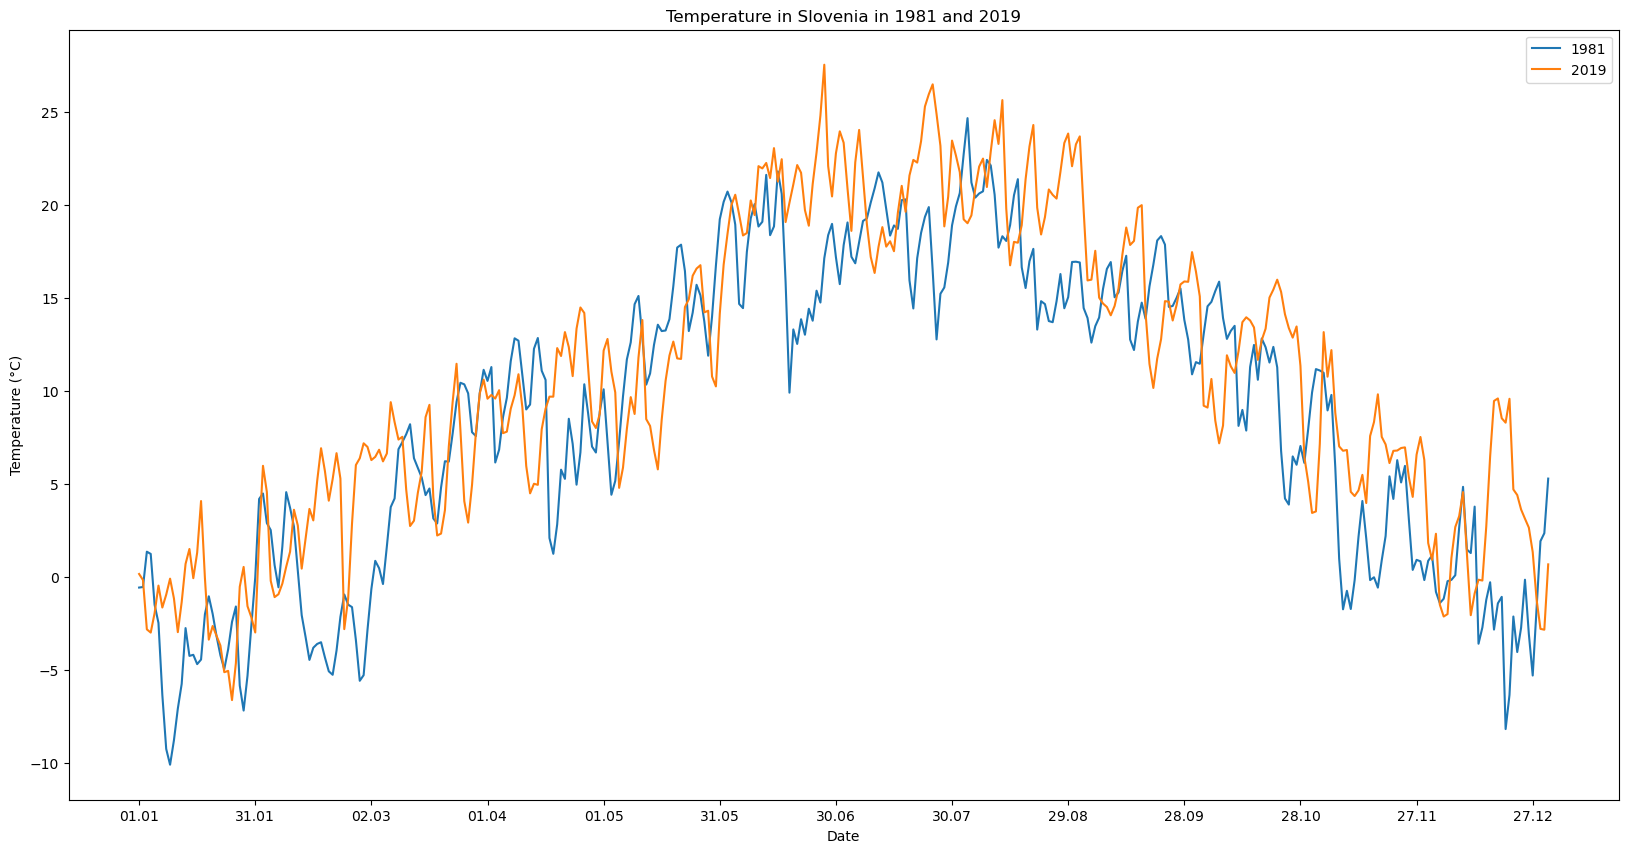

In [15]:
povprecje = podatki.groupby(podatki['utc_timestamp'].dt.date).mean()

povprecje.reset_index(inplace=True)

povprecje['utc_timestamp'] = pd.to_datetime(povprecje['utc_timestamp'])

povprecje['year'] = povprecje['utc_timestamp'].dt.year
povprecje_1981 = povprecje[povprecje['year'] == 1981]
povprecje_2019 = povprecje[povprecje['year'] == 2019]

formatted_dates = np.array([dt.strftime('%d.%m') for dt in povprecje_1981['utc_timestamp']])

plt.figure(figsize=(20, 10))
plt.plot(formatted_dates, povprecje_1981['SI_temperature'], label='1981')
plt.plot(formatted_dates, povprecje_2019['SI_temperature'], label='2019')
# set the x-axis to be in months, not years, show 12 months only
plt.xticks(np.arange(0, len(formatted_dates), 30), formatted_dates[::30])

plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Slovenia in 1981 and 2019')
plt.legend()
plt.show()

Mnenje:
V Sloveniji se temperature povečujejo. 
Na grafu opazimo, da je v Sloveniji leta 1981 bila temperatura dokaj majhna v primerjavi z letom 2019. 

### Prikaz hladnih mescev v letih 1980 do 2020

In [16]:
temperatures = {}

for year in range(1980, 2021): 
    temperatures[year] = []
    for month in range(1, 13):
        month_temps = povprecje[(povprecje['year'] == year) & (povprecje['utc_timestamp'].dt.month == month)]['SI_temperature'].values
        if len(month_temps) > 0: 
            temperatures[year].append(month_temps)

# average temperature for each month
average_temperatures = {}
for year in temperatures:
    average_temperatures[year] = [np.mean(month_temps) for month_temps in temperatures[year]]

years = range(1980, 2021)
january_temperatures = [average_temperatures[year][0] if len(average_temperatures[year]) > 0 else np.nan for year in years]
december_temperatures = [average_temperatures[year][-1] if len(average_temperatures[year]) > 0 else np.nan for year in years]
february_temperatures = [average_temperatures[year][1] if len(average_temperatures[year]) > 0 else np.nan for year in years]



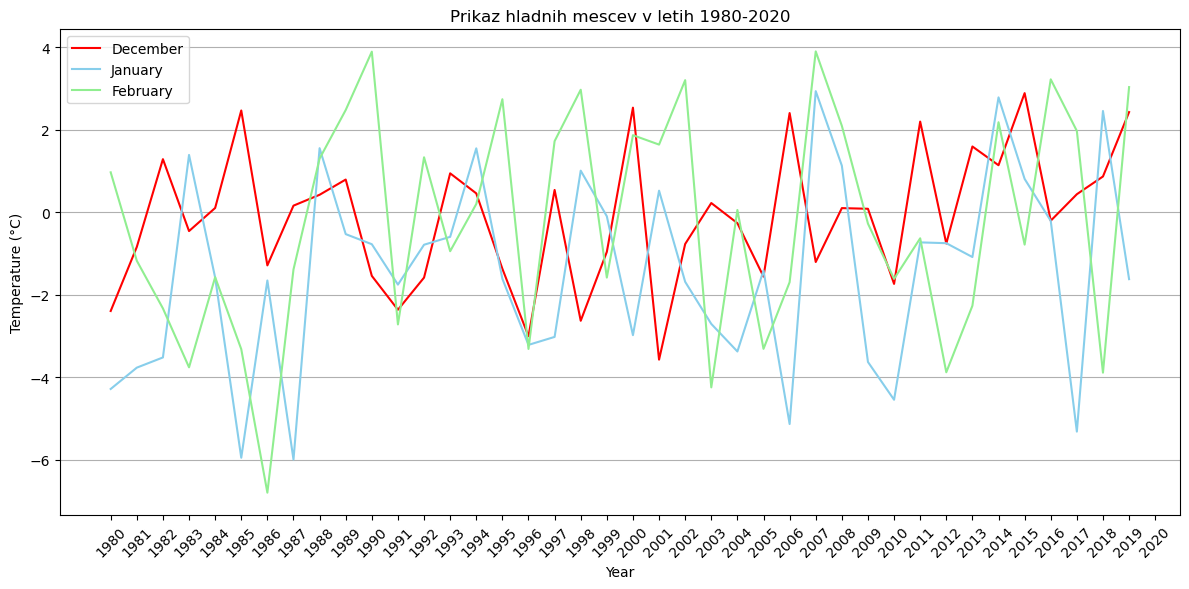

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(years, december_temperatures, color='red')
plt.plot(years, january_temperatures, color='skyblue')
plt.plot(years, february_temperatures, color='lightgreen')


plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Prikaz hladnih mescev v letih 1980-2020')
plt.xticks(years, rotation=45)
plt.grid(axis='y')
plt.legend(['December', 'January', 'February'])
plt.tight_layout()
plt.show()




### Prikaz povprečne temperature za vsak mesec in letnih časov v letih 1980 do 2020

In [18]:
season_months = {
    'Spring': [3, 4, 5],    # March, April, May
    'Summer': [6, 7, 8],    # June, July, August
    'Autumn': [9, 10, 11],  # September, October, November
    'Winter': [12, 1, 2]    # December, January, February
}

#per month
per_month_temperatures = []

years = range(1980, 2020)
for month in range(0, 12):
    temperaturesMonth = [average_temperatures[year][month] if len(average_temperatures[year]) > 0 else np.nan for year in years]
    temp = sum(temperaturesMonth) / len(temperaturesMonth)

    per_month_temperatures.append(temp)


months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print("Average temperature for each month in years 1980-2020:")
for temp in per_month_temperatures:
    print(f'{months[per_month_temperatures.index(temp)]}: {temp:.2f} °C')

# average temperature for each season
average_season_temperatures = {}
for season, months in season_months.items():
    season_temperatures = []
    for month in months:
        season_temperatures.extend([average_temperatures[year][month - 1] for year in years if len(average_temperatures[year]) > 0])
    average_season_temperatures[season] = np.mean(season_temperatures)

#print
print("\nAverage temperature for each season in years 1980-2020:")
for season, temp in average_season_temperatures.items():
    print(f'{season}: {temp:.2f} °C')  
    


Average temperature for each month in years 1980-2020:
January: -1.46 °C
February: -0.27 °C
March: 4.03 °C
April: 8.69 °C
May: 13.66 °C
June: 17.60 °C
July: 20.01 °C
August: 19.79 °C
September: 15.02 °C
October: 9.85 °C
November: 4.19 °C
December: -0.11 °C

Average temperature for each season in years 1980-2020:
Spring: 8.79 °C
Summer: 19.13 °C
Autumn: 9.69 °C
Winter: -0.61 °C


Mnenje: vidimo, da povprečno nahladnejši mesec v letih 1980 do 2020 je januar, najtoplejši pa julij.
Po letnih časih pa je najtoplejši poletje, najhladnejši pa zima. Razlika med njima je približno 20 stopinj.

### Najtoplejši in najhladnejši dan med letoma 1980 in 2020

In [19]:
min_temp = 1000
min_temp_day = ''
max_temp = -1000
max_temp_day = ''

for index, row in povprecje.iterrows():
    if row['SI_temperature'] < min_temp:
        min_temp = row['SI_temperature']
        min_temp_day = row['utc_timestamp'].strftime('%d.%m.%Y')
    if row['SI_temperature'] > max_temp:
        max_temp = row['SI_temperature']
        max_temp_day = row['utc_timestamp'].strftime('%d.%m.%Y')

print(f"\nColdest day in Slovenia from 1980 to 2020 was {min_temp_day} with temperature {min_temp:.2f} °C")
print(f"\nHottest day in Slovenia from 1980 to 2020 was {max_temp_day} with temperature {max_temp:.2f} °C")



Coldest day in Slovenia from 1980 to 2020 was 07.01.1985 with temperature -15.26 °C

Hottest day in Slovenia from 1980 to 2020 was 04.08.2017 with temperature 28.77 °C


### Razlika povprečnih stopinj med letoma 1980 in 2020 v Sloveniji

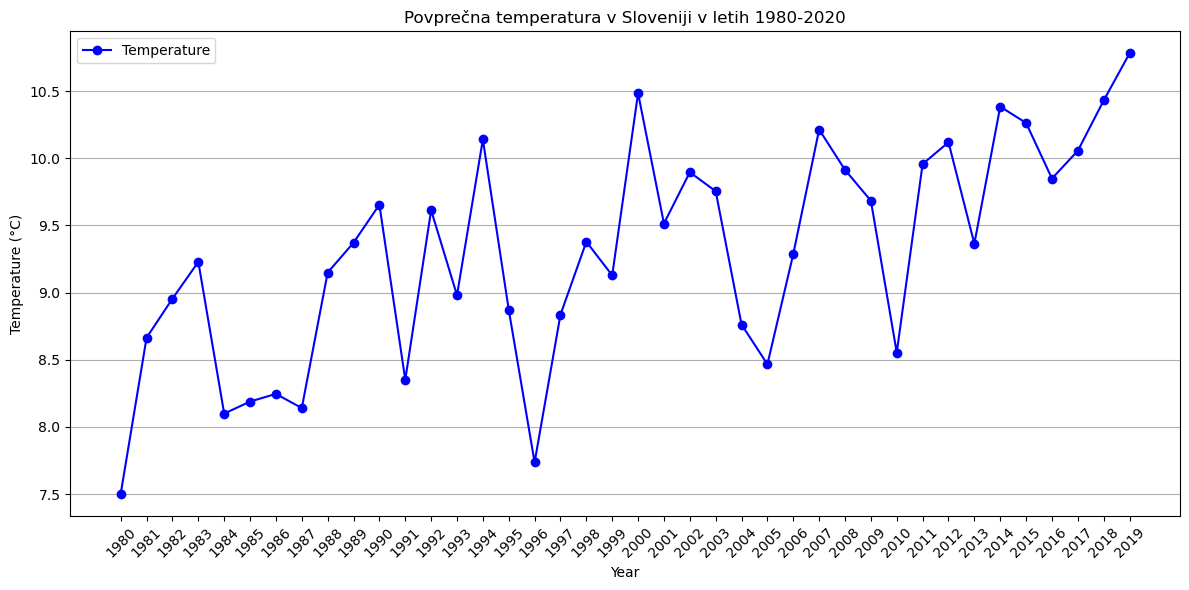

In [20]:
seznam_let = []
years = range(1980, 2020)
for i in years:
    povp = povprecje[povprecje['year'] == i]['SI_temperature'].mean()
    seznam_let.append(povp)

#graf
plt.figure(figsize=(12, 6))
plt.plot(years, seznam_let, color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Povprečna temperatura v Sloveniji v letih 1980-2020')
plt.xticks(years, rotation=45)
plt.grid(axis='y')
plt.legend(['Temperature'])
plt.tight_layout()
plt.show()

In [21]:
razlike = {}
for i in range(0, len(seznam_let)-1):
    razlika = seznam_let[i+1] - seznam_let[i]
    razlike[f'{years[i]}-{years[i+1]}'] = razlika


# sortiranje
razlike = dict(sorted(razlike.items(), key=lambda item: item[1], reverse=True))

# izpisi razlike
print("\nRazlike v povprečni temperaturi med leti 1980-2020:")
for leto, razlika in razlike.items():
    print(f'{leto}: {razlika:.2f} °C')


Razlike v povprečni temperaturi med leti 1980-2020:
2010-2011: 1.40 °C
1999-2000: 1.36 °C
1991-1992: 1.26 °C
1980-1981: 1.16 °C
1993-1994: 1.16 °C
1996-1997: 1.10 °C
2013-2014: 1.02 °C
1987-1988: 1.01 °C
2006-2007: 0.93 °C
2005-2006: 0.82 °C
1997-1998: 0.54 °C
2001-2002: 0.38 °C
2017-2018: 0.37 °C
2018-2019: 0.35 °C
1981-1982: 0.29 °C
1989-1990: 0.28 °C
1982-1983: 0.27 °C
1988-1989: 0.22 °C
2016-2017: 0.21 °C
2011-2012: 0.16 °C
1984-1985: 0.09 °C
1985-1986: 0.06 °C
1986-1987: -0.11 °C
2014-2015: -0.12 °C
2002-2003: -0.14 °C
2008-2009: -0.23 °C
1998-1999: -0.25 °C
2004-2005: -0.30 °C
2007-2008: -0.30 °C
2015-2016: -0.41 °C
1992-1993: -0.63 °C
2012-2013: -0.76 °C
2000-2001: -0.97 °C
2003-2004: -0.99 °C
1983-1984: -1.13 °C
2009-2010: -1.13 °C
1995-1996: -1.14 °C
1994-1995: -1.27 °C
1990-1991: -1.30 °C


In [22]:
#first element
first = list(razlike.keys())[0]
first_value = razlike[first]
last = list(razlike.keys())[-1]
last_value = razlike[first]

if abs(first_value) < abs(last_value):
    first_value = last_value
    first = last

print(f"Največja razlika v povprečni temperaturi je bila med leti {first} z {first_value:.2f} °C")

Največja razlika v povprečni temperaturi je bila med leti 2010-2011 z 1.40 °C


Mnenje: Opazimo, da se temperature počasi povečujejo. Zmeraj gre malo dol, nato pa še več gor ali pa ne gre toliko dol več. Graf kaže dolgoročni trend povečevanja povprečne temperature v Sloveniji od leta 1980 do 2020, kar je skladno s svetovnimi vzorci globalnega segrevanja. Čeprav obstajajo letna nihanja, je splošna smer navzgor, kar poudarja pomembnost razumevanja in obravnave podnebnih sprememb. 